In [35]:
import pandas as pd

In [36]:
df=pd.read_csv(r"C:\Users\Lenovo\OneDrive\Documents\salaries.csv")

In [37]:
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [38]:
df.tail()

,company,job,degree,salary_more_then_100k
11,facebook,sales executive,masters,1
12,facebook,business manager,bachelors,1
13,facebook,business manager,masters,1
14,facebook,computer programmer,bachelors,1
15,facebook,computer programmer,masters,1


In [39]:
df.sample()

,company,job,degree,salary_more_then_100k
11,facebook,sales executive,masters,1


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   company                16 non-null     object
 1   job                    16 non-null     object
 2   degree                 16 non-null     object
 3   salary_more_then_100k  16 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 644.0+ bytes


In [41]:
df.describe()

,salary_more_then_100k
count,16.000
mean,0.625
std,0.500
min,0.000
25%,0.000
50%,1.000
75%,1.000
max,1.000


In [42]:
df.columns

Index(['company', 'job', 'degree', 'salary_more_then_100k'], dtype='object')

In [43]:
df.shape

(16, 4)

In [44]:
df.dtypes

company                  object
job                      object
degree                   object
salary_more_then_100k     int64
dtype: object

In [45]:
df.isna().sum()

company                  0
job                      0
degree                   0
salary_more_then_100k    0
dtype: int64

In [46]:
import matplotlib.pyplot as plt

In [47]:
result=df['degree'].value_counts()
type(result)

pandas.core.series.Series

In [48]:
df['degree']=df['degree'].map({'bachelors':0,'masters':1})
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,0,0
1,google,sales executive,1,0
2,google,business manager,0,1
3,google,business manager,1,1
4,google,computer programmer,0,0
5,google,computer programmer,1,1
6,abc pharma,sales executive,1,0
7,abc pharma,computer programmer,0,0
8,abc pharma,business manager,0,0
9,abc pharma,business manager,1,1


In [49]:
print(result[0])
print(result[1])

8
8


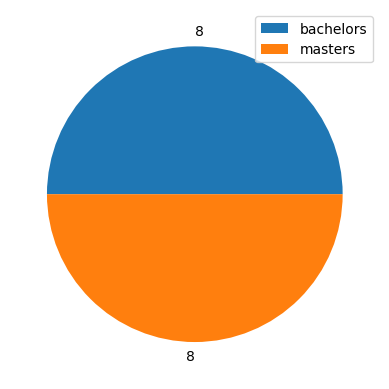

In [50]:
plt.pie(result,labels=result)
plt.legend(['bachelors','masters'])

In [74]:
df.drop('company',axis=1,inplace=True)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   job                    16 non-null     object
 1   degree                 16 non-null     int64 
 2   salary_more_then_100k  16 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 516.0+ bytes


In [77]:
df['job'].unique()

array(['sales executive', 'business manager', 'computer programmer'],
      dtype=object)

<BarContainer object of 3 artists>

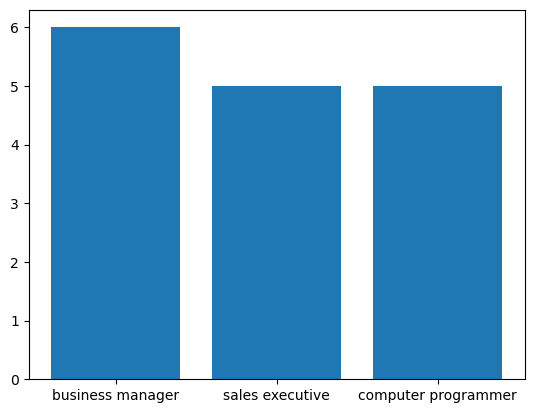

In [78]:
a=df['job'].value_counts()
plt.figure()
x=a.index
y=a.values
plt.bar(x,y)

In [88]:
result=df['job'].value_counts()
type(result)

pandas.core.series.Series

In [89]:
df['job']=df['job'].map({'sales executive':1,'computer programmer':2,'business manager':3})
df

,job,degree,salary_more_then_100k
0,1,0,0
1,1,1,0
2,3,0,1
3,3,1,1
4,2,0,0
5,2,1,1
6,1,1,0
7,2,0,0
8,3,0,0
9,3,1,1


In [90]:
x=df.drop('salary_more_then_100k',axis=1)
x

,job,degree
0,1,0
1,1,1
2,3,0
3,3,1
4,2,0
5,2,1
6,1,1
7,2,0
8,3,0
9,3,1


In [91]:
y=df['salary_more_then_100k']
y

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [94]:
df.shape

(16, 3)

In [95]:
x_train.shape

(11, 2)

In [96]:
x_test.shape

(5, 2)

In [97]:
y_train.shape

(11,)

In [98]:
y_test.shape

(5,)

In [99]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [100]:
y_pred=lr.predict(x_test)
y_pred

array([0, 1, 1, 1, 1], dtype=int64)

In [101]:
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
print(accuracy_score(y_test,y_pred))

0.8


In [102]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1, 1],
       [0, 3]], dtype=int64)

Text(50.722222222222214, 0.5, 'true values')

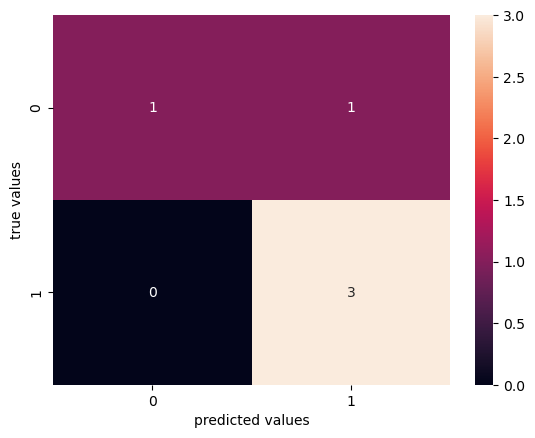

In [103]:
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted values')
plt.ylabel('true values')

In [104]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [105]:
y_pred=dtc.predict(x_test)
y_pred

array([1, 0, 1, 0, 1], dtype=int64)

In [106]:
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
print(accuracy_score(y_test,y_pred))

0.6


In [107]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1, 1],
       [1, 2]], dtype=int64)

Text(50.722222222222214, 0.5, 'true values')

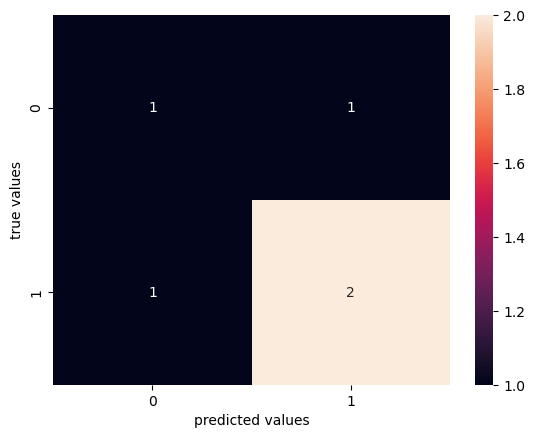

In [108]:
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted values')
plt.ylabel('true values')

In [109]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [110]:
y_pred_rfc=rfc.predict(x_test)
y_pred_rfc

array([1, 1, 1, 0, 1], dtype=int64)

In [111]:
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
print(accuracy_score(y_test,y_pred))

0.6


In [112]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1, 1],
       [1, 2]], dtype=int64)

Text(50.722222222222214, 0.5, 'true values')

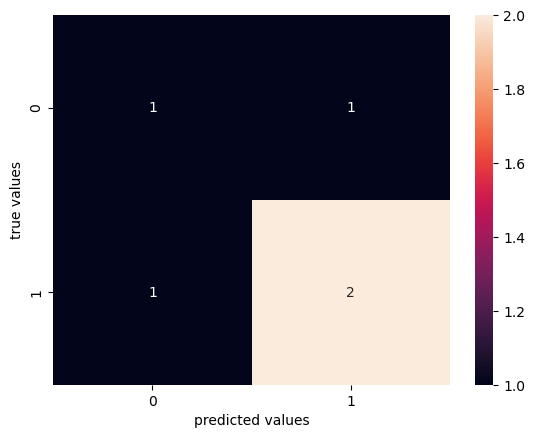

In [113]:
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted values')
plt.ylabel('true values')

In [114]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [115]:
y_pred=svc.predict(x_test)
y_pred

array([1, 1, 1, 1, 1], dtype=int64)

In [116]:
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
print(accuracy_score(y_test,y_pred))

0.6


In [117]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[0, 2],
       [0, 3]], dtype=int64)

Text(50.722222222222214, 0.5, 'true values')

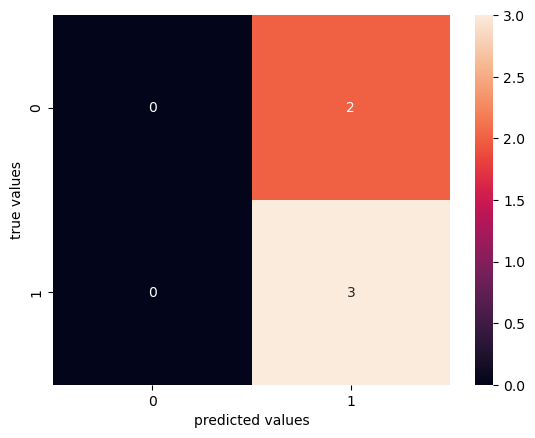

In [118]:
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted values')
plt.ylabel('true values')